In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [226]:
# Importing data and putting it into a dataframe
df = pd.read_excel('PCA India Data_Census.xlsx')

In [227]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [229]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [230]:
dups = df.duplicated()
print('No. of duplicate rows are %d' % (dups.sum()))

No. of duplicate rows are 0


In [231]:
df.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [232]:
# List of columns to be dropped
columns_to_drop = ['State Code', 'Dist.Code', 'State', 'Area Name']

# We'll assign the four identifier columns to another variable which we can later concatenatee with the PCA happened set.
# Assign the dropped columns to a separate list 'id'
id = df[columns_to_drop]

# Create a new DataFrame 'df' with the specified columns dropped
df = df.drop(columns=columns_to_drop, axis=1)

In [233]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,10155.640625,57967.979688,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,15875.701488,55910.282466,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,0.000000,286.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,429.500000,21298.000000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,3834.500000,42693.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,12480.250000,77989.500000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,130119.000000,403261.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


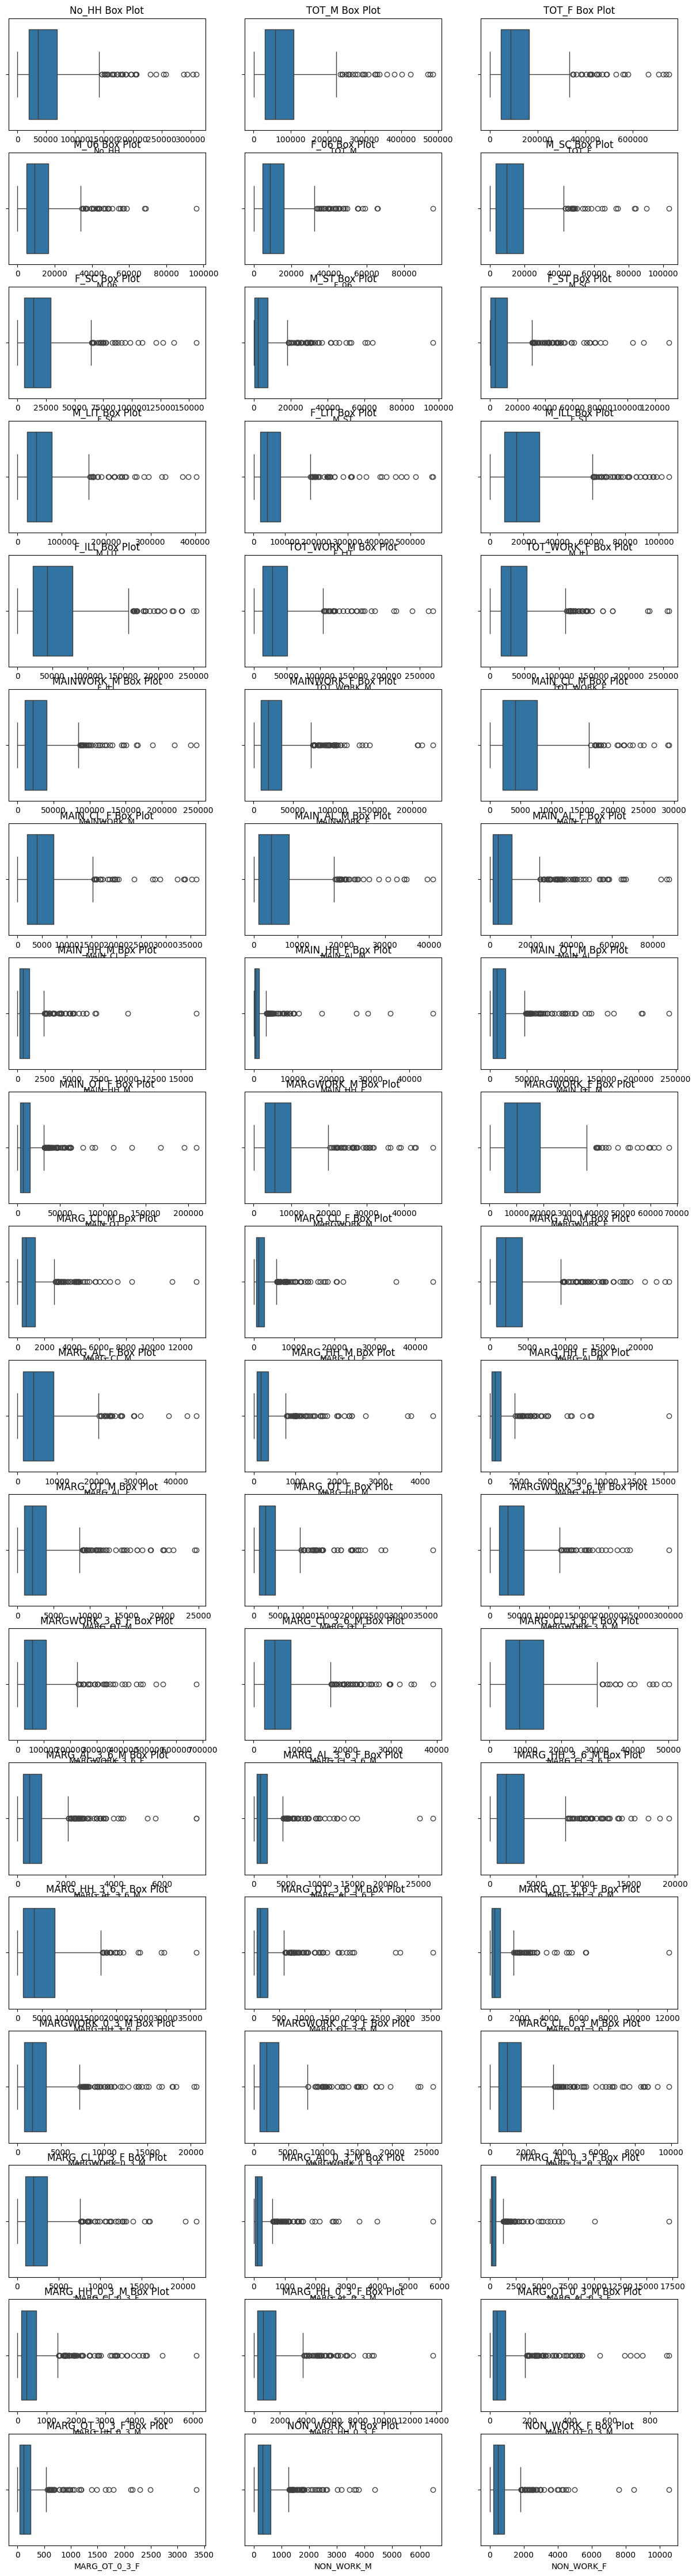

In [234]:
# Set the number of subplots per row (adjust as needed)
subplots_per_row = 3

# Calculate the number of rows needed for subplots
num_rows = (len(df.columns) - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through columns and create Seaborn box plots
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'{column} Box Plot')

# Show the plot
plt.show()

# Outlier Treatment

In [235]:
def treat_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    column = np.where(column > upper_bound, upper_bound, column)
    column = np.where(column < lower_bound, lower_bound, column)

    return column

for column in df.select_dtypes(include=['number']):
    df[column] = treat_outliers(df[column])

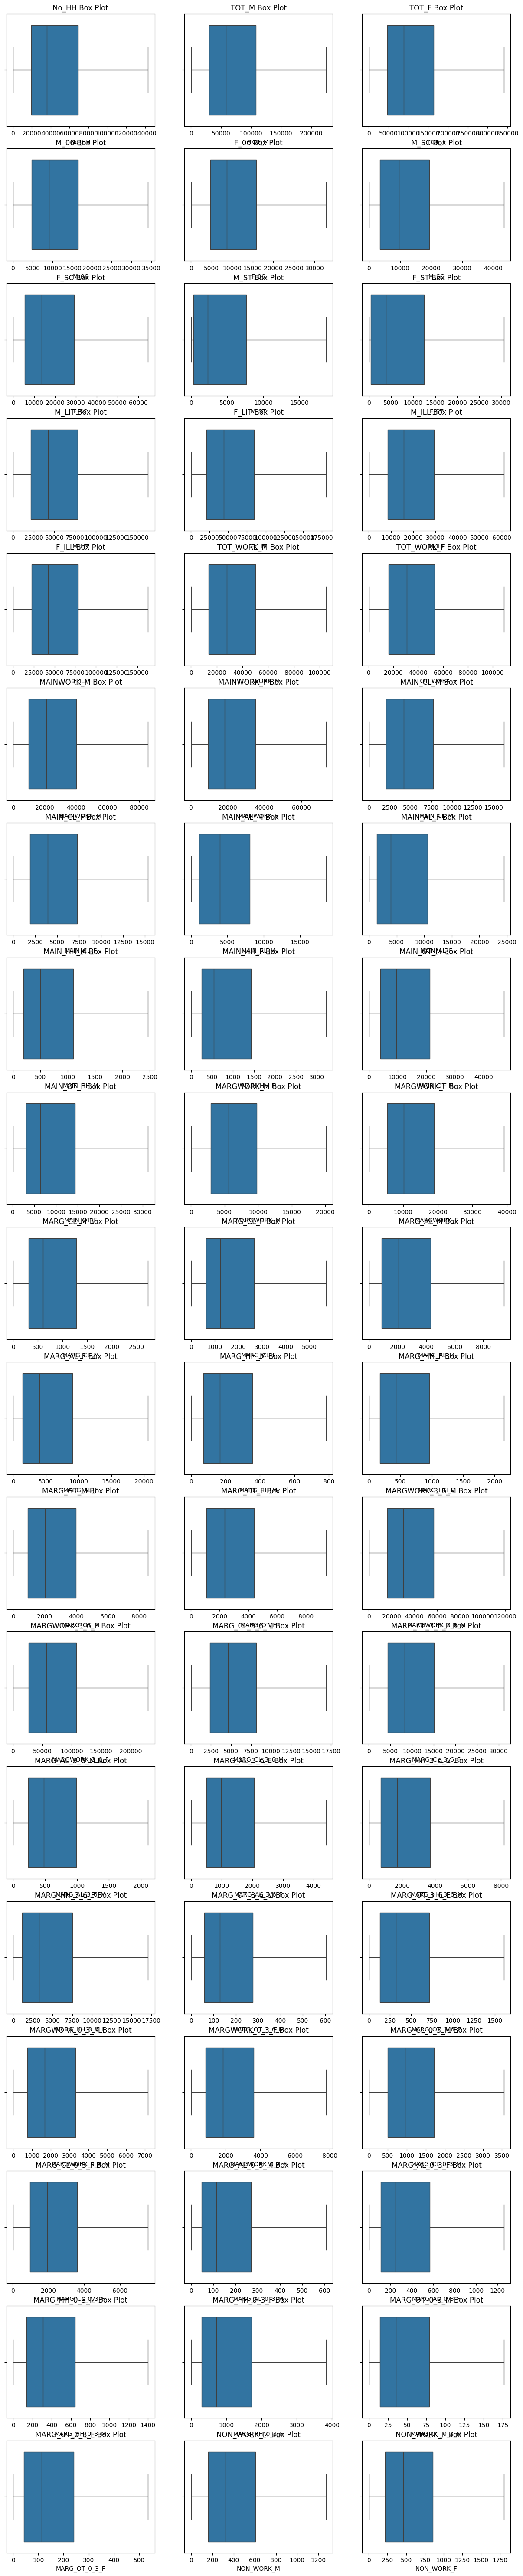

In [236]:
# Get a list of all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Set the number of subplots per row (adjust as needed)
subplots_per_row = 3

# Calculate the number of rows needed for subplots
num_rows = (len(numeric_columns) - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numeric columns and create Seaborn box plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'{column} Box Plot')

# Show the plot
plt.show()

# Scaling the data

In [237]:
from sklearn.preprocessing import MinMaxScaler

# Creating a Min-Max scaler
scale = MinMaxScaler()

# Fitting the scaler to data df (compute min and max values for each feature) 
scale.fit(df)

# Transform your data using the scaler and name it as sc_df(an array)
sc_df = scale.transform(df)

In [238]:
sc_df

array([[0.05157234, 0.1026362 , 0.08554342, ..., 0.08590103, 0.2031896 ,
        0.11624027],
       [0.04113449, 0.08566331, 0.06586414, ..., 0.33239963, 0.11025792,
        0.0862069 ],
       [0.02875489, 0.02746992, 0.03018038, ..., 0.00746965, 0.05276629,
        0.03114572],
       ...,
       [0.00648422, 0.00516818, 0.00567977, ..., 0.08776844, 0.0598543 ,
        0.04004449],
       [0.02391801, 0.02146269, 0.02150198, ..., 0.00746965, 0.07875566,
        0.05450501],
       [0.05345101, 0.05170861, 0.05100914, ..., 0.00746965, 0.11655838,
        0.05228031]])

# Performing PCA & plotting explained variance

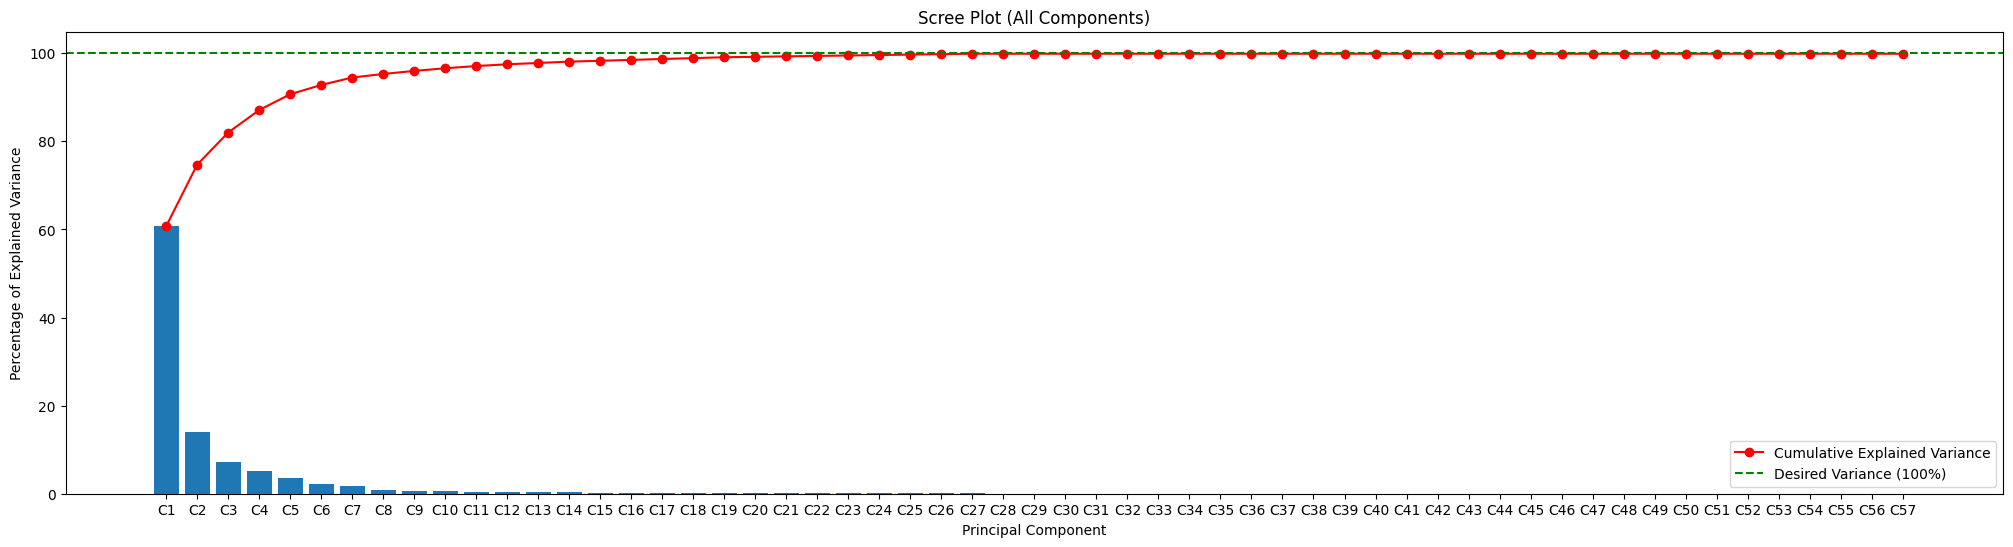

In [239]:
# Creating a PCA model
pca = PCA()

# Fit the PCA model to your scaled data
pca.fit(sc_df)

# Setting the desired variance threshold to 100%
desired_variance_threshold = 1

# Calculate the percentage of explained variance for each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Determine the actual number of components
actual_num_components = len(per_var)

# Create labels for the principal components (e.g., C1, C2, ...)
labels = ['C' + str(x) for x in range(1, actual_num_components + 1)]

# Set the number of components to display (all components)
num_components_to_display = actual_num_components

# Increase the width of the plot
plt.figure(figsize=(25, 6))  # Adjust the width (20) as needed

# Create a bar plot to visualize the explained variance for all components
plt.bar(x=range(1, num_components_to_display + 1), height=per_var[:num_components_to_display], tick_label=labels[:num_components_to_display])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')

# Add a Cumulative Explained Variance Line
cumulative_var = np.cumsum(per_var)
plt.plot(range(1, num_components_to_display + 1), cumulative_var[:num_components_to_display], marker='o', color='r', label='Cumulative Explained Variance')

# Display the Desired Variance Threshold (100%)
plt.axhline(y=desired_variance_threshold * 100, color='g', linestyle='--', label=f'Desired Variance ({desired_variance_threshold * 100}%)')

# Add a legend
plt.legend()

plt.title(f'Scree Plot (All Components)')
plt.show()


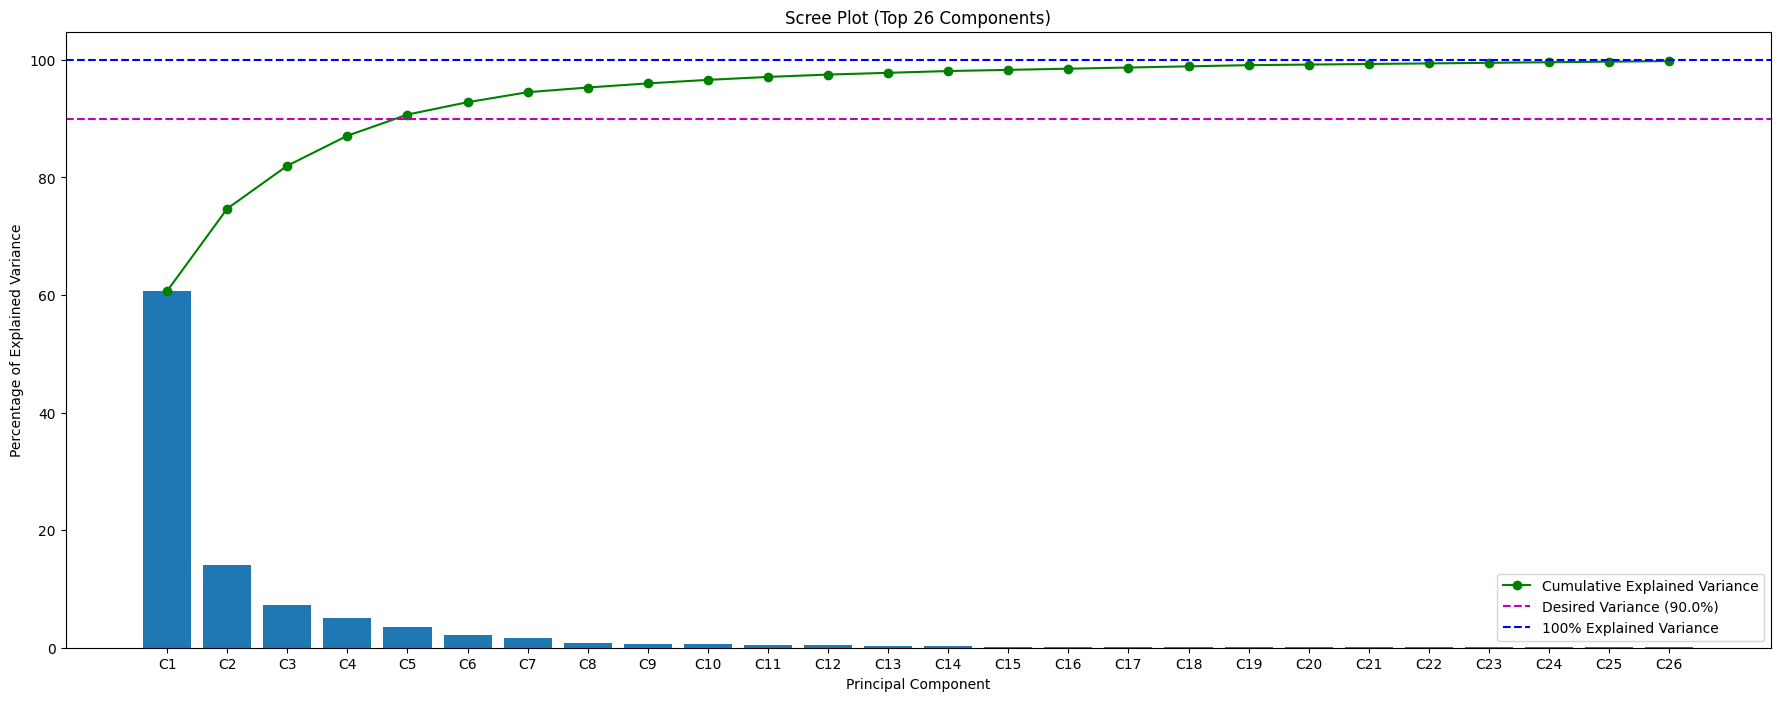

In [240]:
# Set the desired variance threshold to 90%
desired_variance_threshold = 0.9

# Create a PCA model
pca = PCA()
# Fit the CA model to your scaled data
pca.fit(sc_df)

# Calculate the percentage of explained variance for each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Determine the actual number of components
actual_num_components = len(per_var)

# Create labels for the principal components (e.g., PC1, PC2, ...)
labels = ['C' + str(x) for x in range(1, actual_num_components + 1)]

# Set the number of components to display 
num_components_to_display = 26

# Increase the width of the plot
plt.figure(figsize=(22, 8)) 

# Create a bar plot to visualize the explained variance for the top 100 components
plt.bar(x=range(1, num_components_to_display + 1), height=per_var[:num_components_to_display], tick_label=labels[:num_components_to_display])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')

# Add a Cumulative Explained Variance Line
cumulative_var = np.cumsum(per_var)
plt.plot(range(1, num_components_to_display + 1), cumulative_var[:num_components_to_display], marker='o', color='g', label='Cumulative Explained Variance')

# Display the Desired Variance Threshold (90%)
plt.axhline(y=desired_variance_threshold * 100, color='m', linestyle='--', label=f'Desired Variance ({desired_variance_threshold * 100}%)')

# Add a 100% explained variance dotted line
plt.axhline(y=100, color='b', linestyle='--', label='100% Explained Variance')

# Add a legend
plt.legend()

plt.title(f'Scree Plot (Top {num_components_to_display} Components)')
plt.show()


# Conclusions
100% of the variance is shown by first 26 principle components.

While 90% of the variance is shown by first 5 principle components alone.

In [241]:
# Get the loadings for the first 5 components
n_components = 5
loadings = pca.components_[:n_components]

# Create a DataFrame to store the loadings for the first 5 components
loading_df = pd.DataFrame(loadings, columns=df.columns).T
loading_df.columns = [f'Loading_Component_{i + 1}' for i in range(n_components)]

print(loading_df)

                Loading_Component_1  Loading_Component_2  Loading_Component_3  \
No_HH                      0.143727            -0.111477             0.086615   
TOT_M                      0.149739            -0.074168            -0.035722   
TOT_F                      0.149923            -0.088299             0.022771   
M_06                       0.148469            -0.019439            -0.066856   
F_06                       0.151072            -0.014341            -0.061887   
M_SC                       0.141205            -0.077973            -0.044460   
F_SC                       0.142599            -0.087018             0.008707   
M_ST                       0.021696             0.073062             0.382281   
F_ST                       0.020983             0.071930             0.404177   
M_LIT                      0.146137            -0.097461            -0.029841   
F_LIT                      0.141014            -0.125931            -0.005595   
M_ILL                      0

In [242]:
# Get the loadings from PCA
loadings = pca.components_

# Calculate the importance of each original feature for each component
feature_importance = abs(loadings.T)

# Assuming you want to select the top 'k' features for each component
k = 10  # Replace with the desired number of features to select

selected_features = []

for i in range(n_components):
    component_importance = feature_importance[i]
    top_k_indices = component_importance.argsort()[-k:][::-1]
    selected_features.extend(top_k_indices)

# Remove duplicate feature indices
selected_features = list(set(selected_features))

# Create a new DataFrame 'df_new' with the selected features
df_new = df.iloc[:, selected_features]

# Now 'df_new' contains the selected features in a new DataFrame

# Example: Printing 'df_new'
df_new.head()


,No_HH,F_SC,M_ST,F_ST,M_LIT,M_ILL,MAINWORK_M,MAIN_CL_M,MAIN_AL_M,MAIN_HH_M,...,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F
0,7707.0,0.0,1999.0,2598.0,13381.0,10007.0,2763.0,486.0,407.0,78.0,...,1728.0,439.0,343.0,110.0,198.0,798.0,1150.0,237.0,680.0,252.0
1,6218.0,6.0,427.0,517.0,10513.0,9072.0,4628.0,1098.0,442.0,538.0,...,1752.0,261.0,432.0,293.0,449.0,472.0,525.0,229.0,186.0,148.0
2,4452.0,6.0,5806.0,9723.0,4534.0,2012.0,1940.0,519.0,36.0,19.0,...,1689.0,316.0,1161.0,15.0,28.0,377.0,114.0,89.0,3.0,34.0
3,1320.0,0.0,2666.0,3968.0,1842.0,942.0,491.0,35.0,8.0,9.0,...,463.0,74.0,158.0,6.0,33.0,146.0,194.0,128.0,13.0,50.0
4,11654.0,33.0,7670.0,10843.0,13243.0,7348.0,2523.0,743.0,254.0,35.0,...,3497.0,862.0,1419.0,38.0,214.0,1097.0,874.0,1043.0,205.0,302.0


In [243]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   F_SC            640 non-null    float64
 2   M_ST            640 non-null    float64
 3   F_ST            640 non-null    float64
 4   M_LIT           640 non-null    float64
 5   M_ILL           640 non-null    float64
 6   MAINWORK_M      640 non-null    float64
 7   MAIN_CL_M       640 non-null    float64
 8   MAIN_AL_M       640 non-null    float64
 9   MAIN_HH_M       640 non-null    float64
 10  MARGWORK_M      640 non-null    float64
 11  MARG_HH_F       640 non-null    float64
 12  MARG_OT_F       640 non-null    float64
 13  MARGWORK_3_6_M  640 non-null    float64
 14  MARG_CL_3_6_M   640 non-null    float64
 15  MARG_CL_3_6_F   640 non-null    float64
 16  MARG_AL_3_6_M   640 non-null    float64
 17  MARG_AL_3_6_F   640 non-null    flo

In [244]:
id.head()

,State Code,Dist.Code,State,Area Name
0,1,1,Jammu & Kashmir,Kupwara
1,1,2,Jammu & Kashmir,Badgam
2,1,3,Jammu & Kashmir,Leh(Ladakh)
3,1,4,Jammu & Kashmir,Kargil
4,1,5,Jammu & Kashmir,Punch


In [245]:
df_new = pd.concat([id, df_new], axis=1)

In [246]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   State           640 non-null    object 
 3   Area Name       640 non-null    object 
 4   No_HH           640 non-null    float64
 5   F_SC            640 non-null    float64
 6   M_ST            640 non-null    float64
 7   F_ST            640 non-null    float64
 8   M_LIT           640 non-null    float64
 9   M_ILL           640 non-null    float64
 10  MAINWORK_M      640 non-null    float64
 11  MAIN_CL_M       640 non-null    float64
 12  MAIN_AL_M       640 non-null    float64
 13  MAIN_HH_M       640 non-null    float64
 14  MARGWORK_M      640 non-null    float64
 15  MARG_HH_F       640 non-null    float64
 16  MARG_OT_F       640 non-null    float64
 17  MARGWORK_3_6_M  640 non-null    flo

In [247]:
# Exporting the final dataset into a csv file for further analysis
df_new.to_csv('data_post_PCA.csv', index=False)